In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/hp/OneDrive/Desktop/DSA Internship/titanic_dataset.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.shape

(891, 12)

In [7]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
num_col = data[['Cabin','Embarked']]

In [10]:
for i in num_col:
 num_col = num_col.fillna(num_col.mode().iloc[0])

In [11]:
data=data.drop(['Cabin','Embarked'],axis=1)

In [12]:
data=pd.concat([data,num_col],axis=1)

In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
data=data.drop(['Name','Ticket','Cabin'],axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
categ = ['Embarked','Sex']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [16]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [17]:
corr_matrix= data.corr()

[]

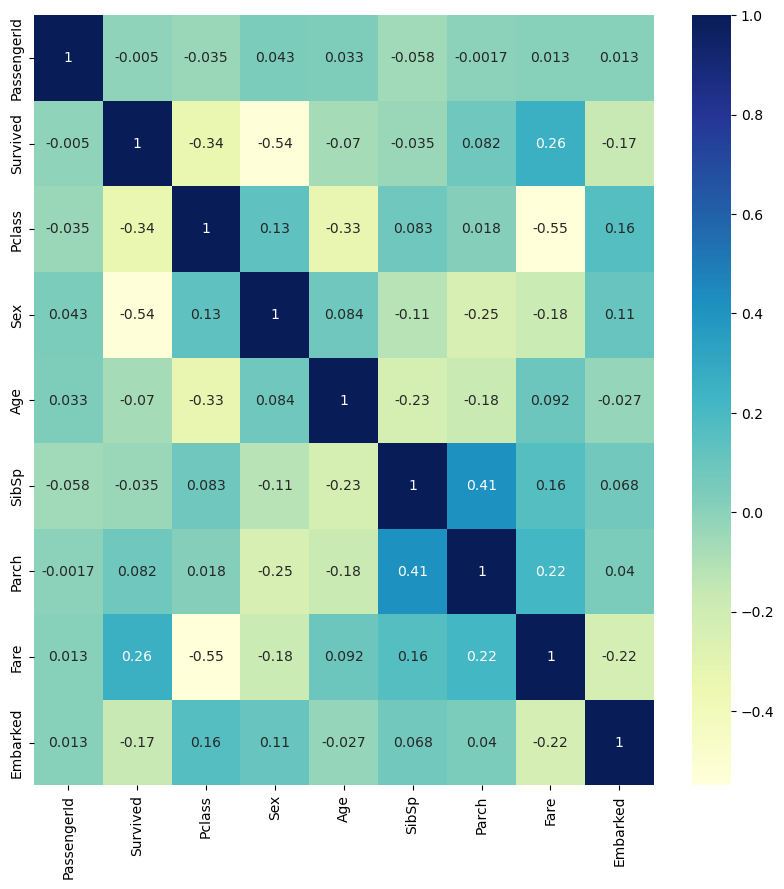

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.plot()

In [19]:
x=data.drop('Survived', axis=1) 
y=data['Survived']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42, test_size=0.2)

# SVM

In [27]:
from sklearn.svm import SVC
svm_cls = SVC(kernel ='linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

In [38]:
print('accuracy is :', accuracy_score(y_test,y_pred_svm))
print('Precision is :',precision_score(y_test,y_pred_svm))
print('Recall is :',recall_score(y_test,y_pred_svm))
print('F1 is :',f1_score(y_test,y_pred_svm))

accuracy is : 0.7821229050279329
Precision is : 0.7536231884057971
Recall is : 0.7027027027027027
F1 is : 0.7272727272727273


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt= dt_cls.predict(x_test) 

In [40]:
print('accuracy is :',accuracy_score(y_test,y_pred_dt))
print('Precision is :',precision_score(y_test,y_pred_dt))
print('Recall is :',recall_score(y_test,y_pred_dt))
print('F1 is :',f1_score(y_test,y_pred_dt))

accuracy is : 0.7541899441340782
Precision is : 0.7027027027027027
Recall is : 0.7027027027027027
F1 is : 0.7027027027027027


# k-fold CV using DecisionTreeClassifier

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.6424581  0.78089888 0.79213483 0.78089888 0.43820225]
Average CV Score:  0.6869185864038666
Number of CV Scores used in Average:  5


# K-Fold Cross-Validation with linear regression model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [47]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [-0.31959982 -0.3004504  -0.33151913 -0.30395365 -0.27732534 -0.29249459
 -0.25387163 -0.29614339 -0.27572687 -0.29826859]
Average CV Score:  -0.2949353422142771
Number of CV Scores used in Average:  10


# Stratified K-Fold using DecisionTreeClassifier

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [49]:
clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.61452514 0.7752809  0.82022472 0.75842697 0.83707865]
Average CV Score:  0.7611072751239721
Number of CV Scores used in Average:  5


# Stratified K-Fold Cross-Validation using linear model

In [50]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [51]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [52]:
lr = linear_model.LogisticRegression()

In [53]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

In [54]:
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

In [55]:
print('\nAccuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


Accuracy: 79.80024968789013 %

Standard Deviation is: 0.050963249599766156
